Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years Administration -- spend on administration in the past few years Marketing Spend -- spend on Marketing in the past few years State -- states from which data is collected Profit -- profit of each state in the past few years

In [1]:
from google.colab import files
upload=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [2]:
import pandas as pd
df=pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["State"]=LE.fit_transform(df["State"])

In [5]:
# Standardization Y variable
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
df["Profit"]=pd.DataFrame(MM.fit_transform(df[["Profit"]]))

In [6]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


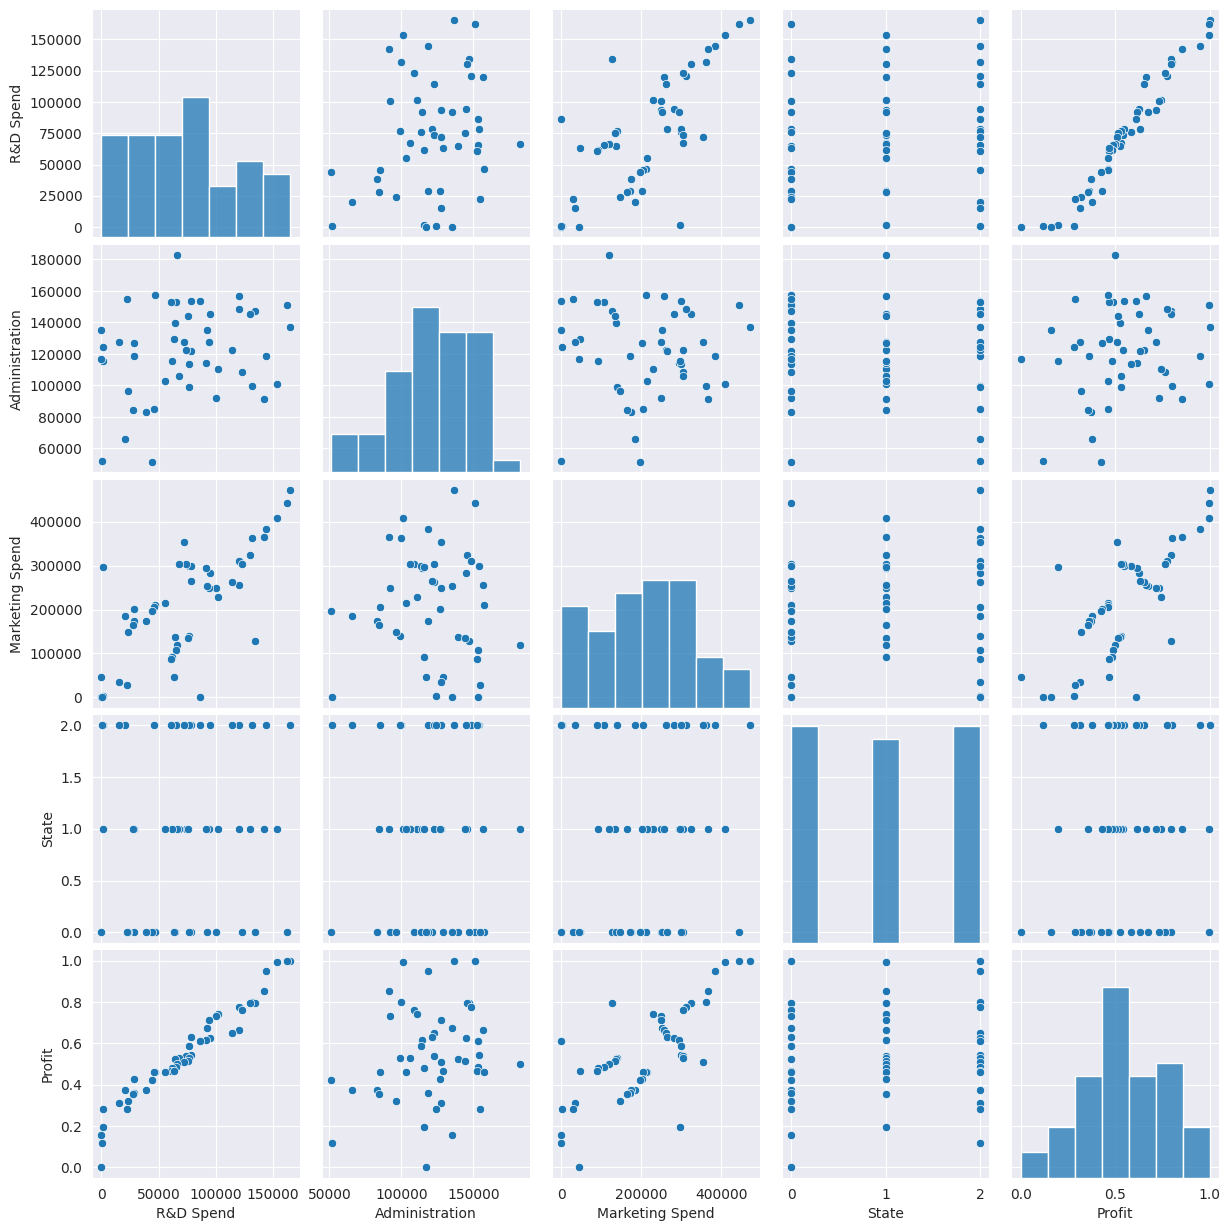

In [7]:
#EDA
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)

In [8]:
#X=df[["R&D Spend"]]                                                 #============== Case-1
#X=df[["R&D Spend","Marketing Spend"]]                        #============== Case-2
X=df[["R&D Spend","Marketing Spend","Administration"]]             #============== Case-3   <<<Good>>>>
#X=df[["R&D Spend","Marketing Spend","Administration","State"]]             #============== Case-4
Y=df["Profit"]

In [9]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)

LinearRegression()

In [10]:
Y_pred=LR.predict(X)
Y_pred

array([1.00146088, 0.98251462, 0.94304242, 0.89545509, 0.88668619,
       0.83848981, 0.80770554, 0.81844583, 0.77182097, 0.7895199 ,
       0.68041065, 0.68077498, 0.64453417, 0.63524225, 0.75947134,
       0.74081226, 0.57570536, 0.65047172, 0.64383686, 0.56849629,
       0.57415262, 0.57798065, 0.56326917, 0.53674391, 0.55570068,
       0.49305166, 0.54014497, 0.56158593, 0.48979849, 0.49055847,
       0.47736664, 0.4674302 , 0.4748267 , 0.46870935, 0.41872786,
       0.4270189 , 0.34128071, 0.42199547, 0.30980909, 0.38882444,
       0.33863278, 0.33855733, 0.31500662, 0.25614106, 0.28116812,
       0.18565813, 0.23361137, 0.17912553, 0.19422179, 0.18883688])

In [11]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("Mean Squared Error:",mse.round(3))
import numpy as np
print("Root Mean Squared Error:",np.sqrt(mse).round(3))

Mean Squared Error: 0.002
Root Mean Squared Error: 0.05


In [12]:
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("r2_score:",r2.round(3))

r2_score: 0.951


In [13]:
## R2 values with cases without model improvement
# Case-1      r2_score 0.947
# Case-2      r2_score 0.950
# Case-3      r2_score 0.951
# Case-4      r2_score 0.951

In [14]:
# Preparing a model
#Build a full model
import statsmodels.api as sm
model=sm.OLS(Y,X).fit()
model.summary()
model.resid

0    -0.040575
1    -0.039574
2     0.071298
3     0.050503
4     0.006594
5    -0.011741
6    -0.000327
7    -0.055224
8    -0.033765
9    -0.006325
10    0.088699
11    0.099451
12    0.068082
13    0.023577
14   -0.131043
15   -0.082657
16    0.054101
17   -0.061119
18   -0.020794
19    0.053293
20    0.010470
21   -0.089503
22   -0.038775
23    0.000103
24    0.028505
25    0.024089
26   -0.034299
27   -0.085929
28   -0.051878
29   -0.021409
30    0.040795
31   -0.015065
32    0.020385
33    0.020133
34   -0.009711
35    0.084242
36    0.073079
37    0.101331
38    0.137955
39    0.042288
40    0.023759
41    0.070632
42    0.044619
43    0.071423
44   -0.014079
45    0.121538
46   -0.066050
47   -0.013727
48    0.050715
49   -0.164278
dtype: float64

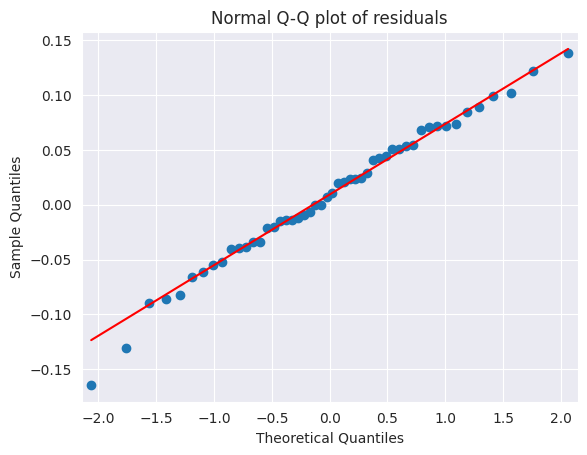

[array([], dtype=int64)]

In [15]:
# Residual Analysis
# Test for Normality of Residuals (Q-Q Plot)
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

list(np.where(model.resid>10))


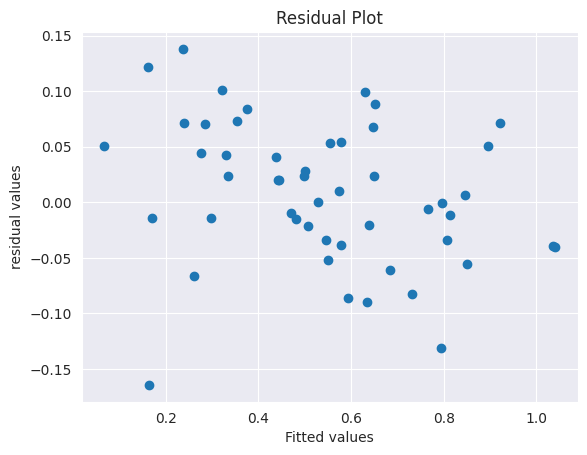

In [16]:
## Residual Plot for Homoscedasticity

import matplotlib.pyplot as plt
model.fittedvalues
model.resid

plt.scatter(model.fittedvalues,model.resid)
plt.title("Residual Plot")
plt.xlabel("Fitted values")
plt.ylabel("residual values")
plt.show()

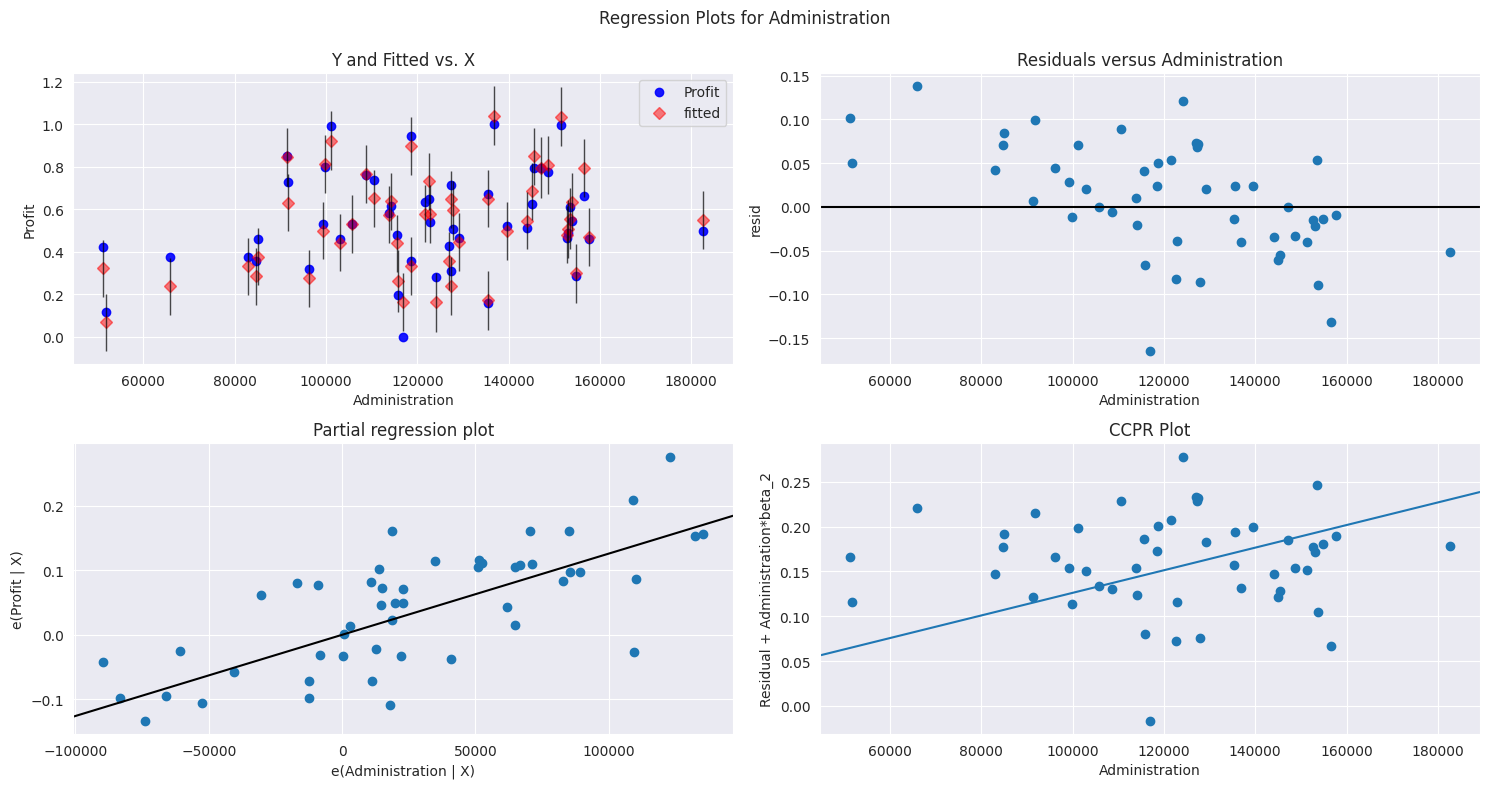

In [17]:
#Residual Vs Regressors
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

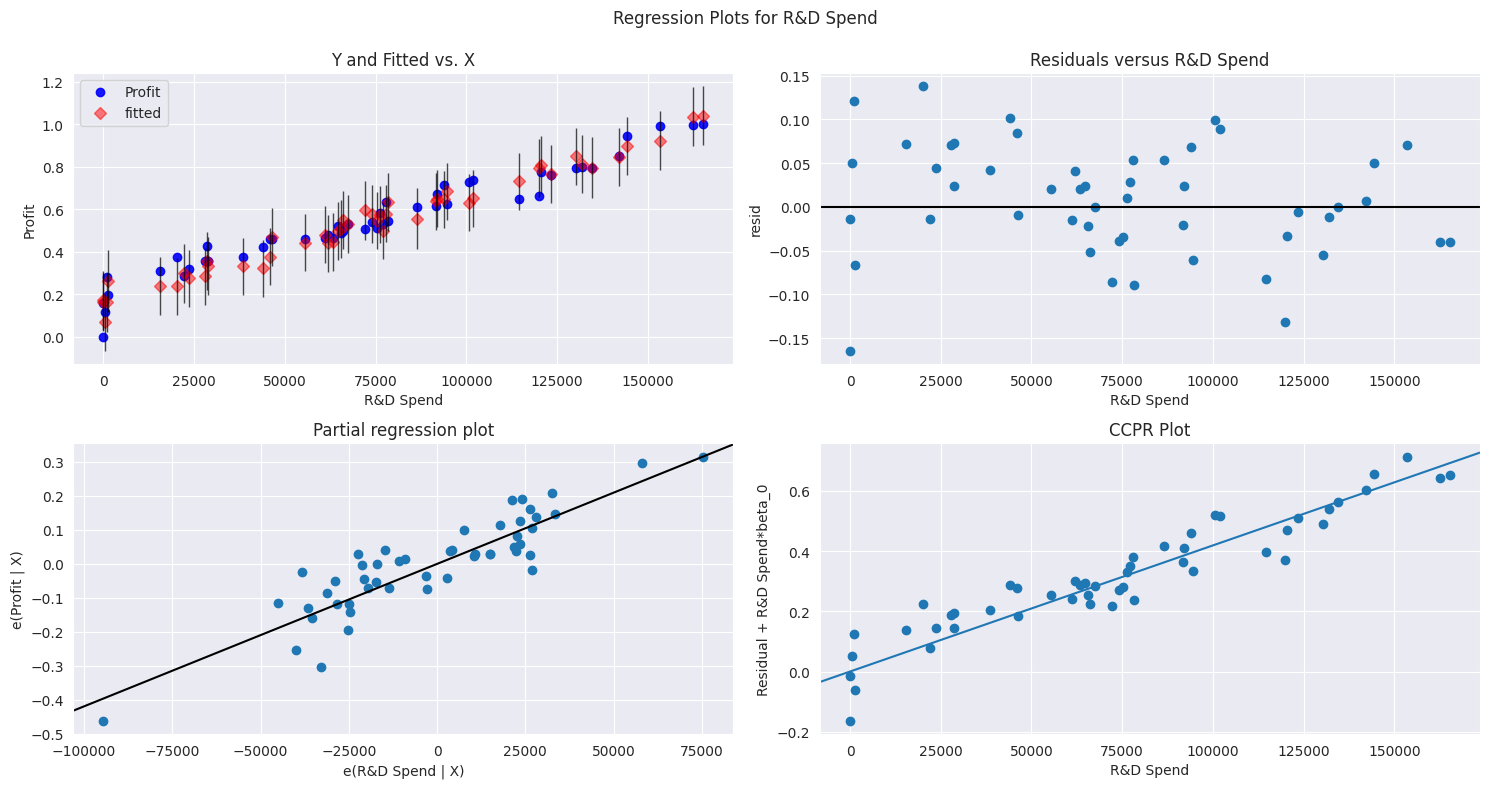

In [18]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"R&D Spend",fig=fig)
plt.show()

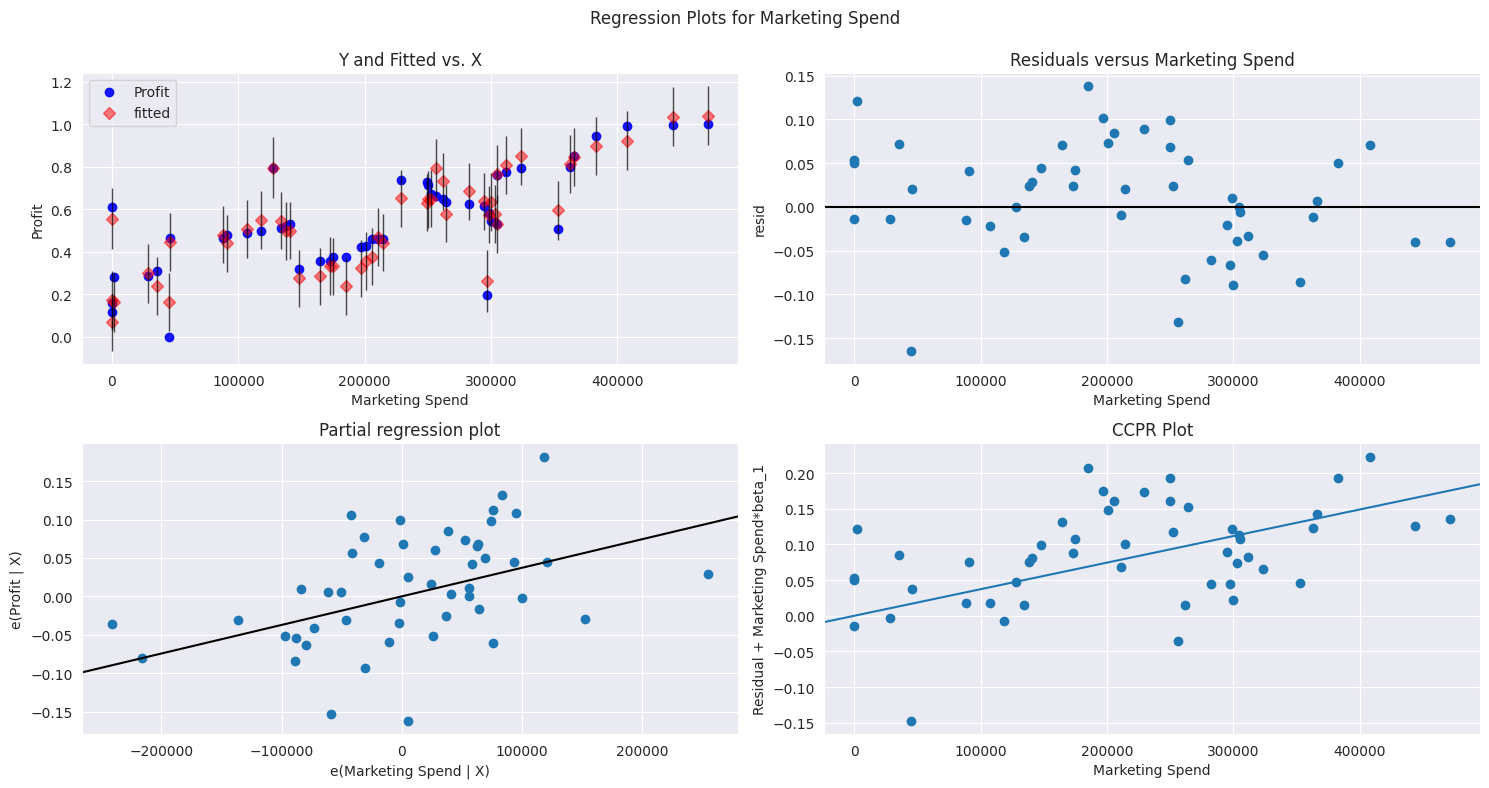

In [19]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Marketing Spend",fig=fig)
plt.show()

In [20]:
# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook’s Distance

model_influence = model.get_influence()
(cooks , Pvalue) = model_influence.cooks_distance
(cooks ,Pvalue)


(array([1.67389164e-02, 1.24245218e-02, 5.11837947e-02, 1.72024182e-02,
        3.64191931e-04, 8.61000908e-04, 2.04023892e-06, 1.20943423e-02,
        3.69281874e-03, 1.70404503e-04, 2.02715662e-02, 2.62240298e-02,
        9.07580618e-03, 1.12953302e-03, 6.96428657e-02, 2.22916843e-02,
        6.30100844e-03, 9.06238877e-03, 1.07804092e-03, 5.86951641e-02,
        3.64546212e-04, 3.21251950e-02, 5.72706637e-03, 4.80988228e-08,
        1.69567412e-03, 1.70056381e-03, 4.40438724e-03, 5.43330057e-02,
        2.01821159e-02, 2.26901011e-03, 4.94448870e-03, 1.27121561e-03,
        2.65301804e-03, 7.46306418e-04, 5.22947285e-04, 1.40281210e-02,
        3.15113230e-02, 1.91102404e-02, 7.31739667e-02, 2.89158041e-03,
        2.32922503e-03, 1.17392286e-02, 5.57225944e-03, 2.80244020e-02,
        1.76483905e-03, 1.05712956e-01, 1.30924634e-01, 1.69419350e-03,
        2.79444441e-03, 1.60627147e-01]),
 array([0.99700789, 0.9980787 , 0.98451633, 0.99688413, 0.99999025,
        0.99996456, 1.    

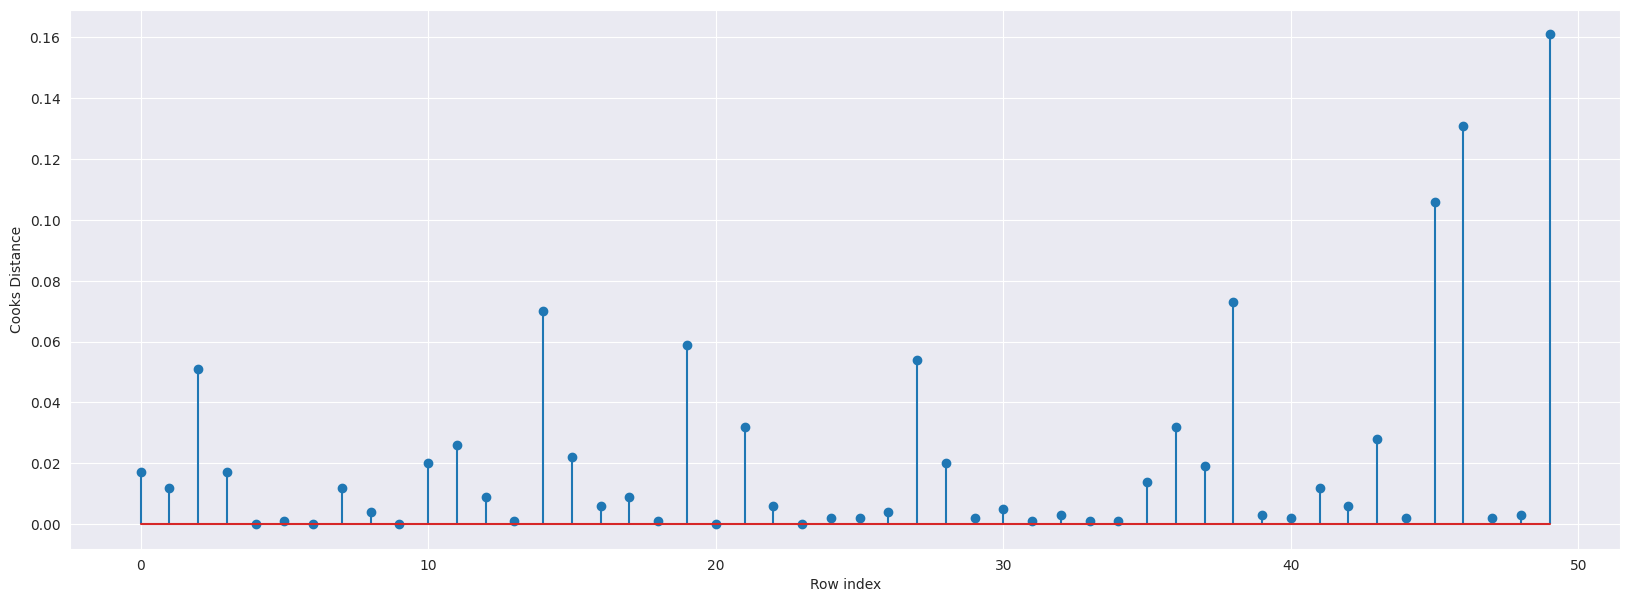

In [21]:
#Plot the influencers values using stem plot
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(cooks, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [22]:
# index and value of influencer where c is more than .5
(np.argmax(cooks),np.max(cooks))

(49, 0.1606271473939891)

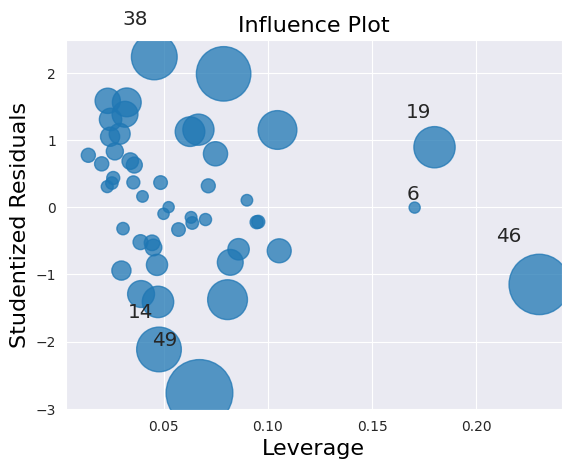

In [23]:
# High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()     # from the plot 38,46 and 49(from cooks distance) are the highly influencers

In [24]:
df[df.index.isin([38,46,49])]


,R&D Spend,Administration,Marketing Spend,State,Profit
38,20229.59,65947.93,185265.10,2,0.374747
46,1315.46,115816.21,297114.46,1,0.196020
49,0.00,116983.80,45173.06,0,0.000000


In [25]:
df_new = df

In [26]:
df1_new = df_new.drop(["Marketing Spend"],axis=1)
df1_new          # R&D Spend and Marketing Spend are having moderate level of multicollinearity issues

,R&D Spend,Administration,State,Profit
0,165349.20,136897.80,2,1.000000
1,162597.70,151377.59,0,0.997355
2,153441.51,101145.55,1,0.993178
3,144372.41,118671.85,2,0.947292
4,142107.34,91391.77,1,0.853171
5,131876.90,99814.71,2,0.801382
6,134615.46,147198.87,0,0.796490
7,130298.13,145530.06,1,0.794407
8,120542.52,148718.95,2,0.774468
9,123334.88,108679.17,0,0.760661


In [27]:
df1_new = df1_new.drop(df1_new.index[[38,46,49]],axis=0).reset_index()
df1_new                   # High influence points

,index,R&D Spend,Administration,State,Profit
0,0,165349.20,136897.80,2,1.000000
1,1,162597.70,151377.59,0,0.997355
2,2,153441.51,101145.55,1,0.993178
3,3,144372.41,118671.85,2,0.947292
4,4,142107.34,91391.77,1,0.853171
5,5,131876.90,99814.71,2,0.801382
6,6,134615.46,147198.87,0,0.796490
7,7,130298.13,145530.06,1,0.794407
8,8,120542.52,148718.95,2,0.774468
9,9,123334.88,108679.17,0,0.760661


In [28]:
df1_new =df1_new.drop(["index"],axis=1)    #Drop newly created index column
df1_new

,R&D Spend,Administration,State,Profit
0,165349.20,136897.80,2,1.000000
1,162597.70,151377.59,0,0.997355
2,153441.51,101145.55,1,0.993178
3,144372.41,118671.85,2,0.947292
4,142107.34,91391.77,1,0.853171
5,131876.90,99814.71,2,0.801382
6,134615.46,147198.87,0,0.796490
7,130298.13,145530.06,1,0.794407
8,120542.52,148718.95,2,0.774468
9,123334.88,108679.17,0,0.760661


In [29]:
X = df_new[["R&D Spend","Administration"]]             #============== Case-3   <<<Good>>>>
Y = df_new["Profit"]

In [30]:
## Built full model
import statsmodels.api as sm

model2 = sm.OLS(Y, X)  # Capitalize OLS
model2 = model2.fit()

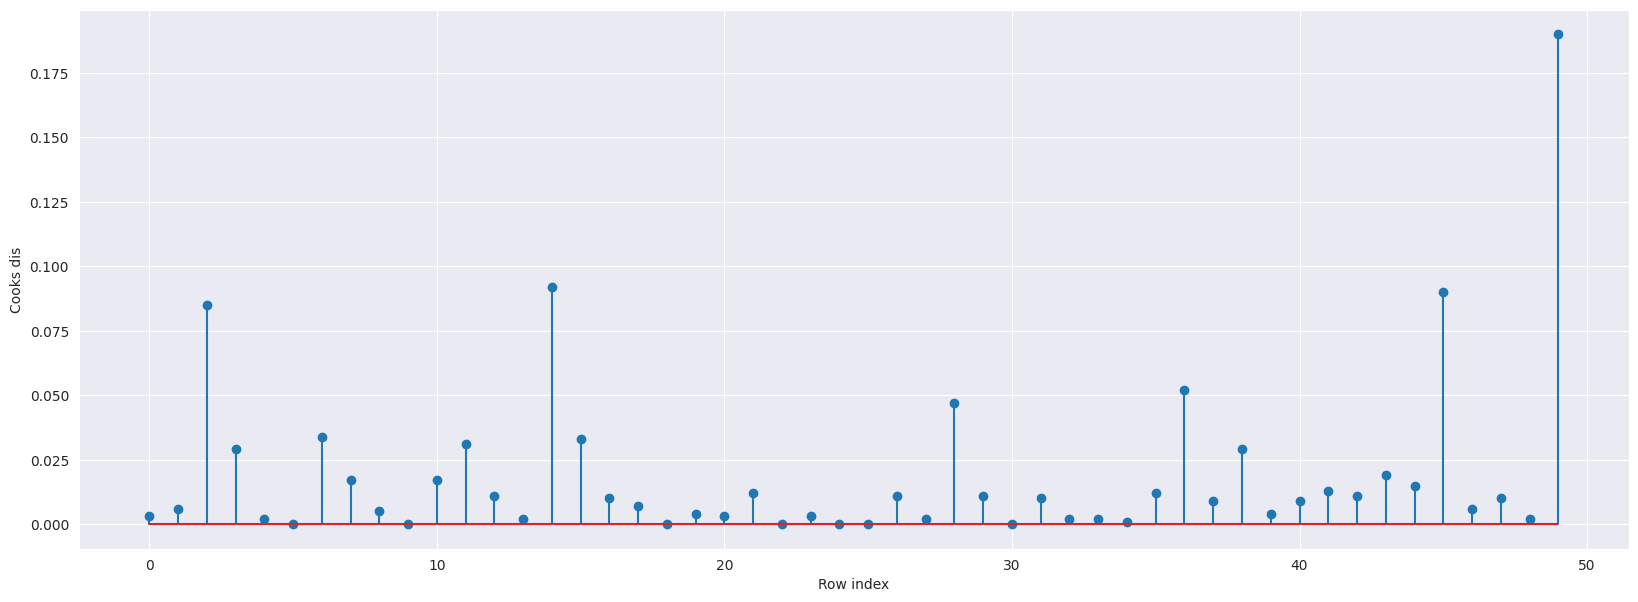

In [31]:
# Cook’s Distance

model_influence = model2.get_influence()
(cooks2 , P_value) = model_influence.cooks_distance
(cooks2 , P_value)

# Plot the influence values using the stemplot

fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new)),np.round(cooks2,3))
plt.xlabel("Row index")
plt.ylabel("Cooks dis")
plt.show()

In [32]:
#index and value of influencer where c is more than 0.5
(np.argmax(cooks2),np.max(cooks2))

(49, 0.1895989375014048)

In [33]:
df_new2 = df_new.drop(df1_new.index[[2]],axis=0).reset_index()
df_new2                   # High influence points

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,2,1.000000
1,1,162597.70,151377.59,443898.53,0,0.997355
2,3,144372.41,118671.85,383199.62,2,0.947292
3,4,142107.34,91391.77,366168.42,1,0.853171
4,5,131876.90,99814.71,362861.36,2,0.801382
5,6,134615.46,147198.87,127716.82,0,0.796490
6,7,130298.13,145530.06,323876.68,1,0.794407
7,8,120542.52,148718.95,311613.29,2,0.774468
8,9,123334.88,108679.17,304981.62,0,0.760661
9,10,101913.08,110594.11,229160.95,1,0.740175


In [34]:
df_new2 =df_new2.drop(["index"],axis=1)    #Drop newly created index column
df_new2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,1.000000
1,162597.70,151377.59,443898.53,0,0.997355
2,144372.41,118671.85,383199.62,2,0.947292
3,142107.34,91391.77,366168.42,1,0.853171
4,131876.90,99814.71,362861.36,2,0.801382
5,134615.46,147198.87,127716.82,0,0.796490
6,130298.13,145530.06,323876.68,1,0.794407
7,120542.52,148718.95,311613.29,2,0.774468
8,123334.88,108679.17,304981.62,0,0.760661
9,101913.08,110594.11,229160.95,1,0.740175


# Predict new improved model

In [35]:
x = df_new2[["R&D Spend","Administration"]]             #============== Case-3   <<<Good>>>>
y = df_new2["Profit"]

In [36]:
# Model fitting

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [37]:
# Model predicted values
y_pred = LR.predict(x)
y_pred

array([0.98308932, 0.96630244, 0.88685635, 0.88271288, 0.83150674,
       0.83296166, 0.81264152, 0.76500745, 0.7882995 , 0.68495821,
       0.68363953, 0.64217636, 0.63117224, 0.76019738, 0.74254708,
       0.5674733 , 0.64160336, 0.63526646, 0.59996426, 0.56093334,
       0.56133866, 0.54788347, 0.52105638, 0.56832792, 0.49894161,
       0.5490203 , 0.53756785, 0.49496468, 0.50013225, 0.49202117,
       0.47875288, 0.49546157, 0.46391132, 0.40688102, 0.4228336 ,
       0.32914773, 0.42183208, 0.3037297 , 0.38754163, 0.33168321,
       0.33589821, 0.31264661, 0.26588168, 0.29115203, 0.19702257,
       0.2005941 , 0.18943669, 0.21269524, 0.19398899])

In [38]:
# Model evaluation

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print("Mean square error ",mse.round(3))

import numpy as np
print("Root mean square error ", np.sqrt(mse).round(3))

Mean square error  0.003
Root mean square error  0.051


In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print("r2_score",r2.round(3))

r2_score 0.945
